## Problem statement : 
### Using a training set of historical data containing features of each customer predict a label representing whether the insured files a claim or not on their travel.

In [21]:
## Importing necessary libraries
import numpy as np # numpy is used for arithmetic operations
import pandas as pd # pandas is used for reading and storing data 

## matplotlib and seaborn are used for plotting and visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
# SimpleImputer is used for replacing missing values with given strategy
from sklearn.impute import SimpleImputer
## RobustScaler is used to scale the data
from sklearn.preprocessing import RobustScaler
# train_test_split is used to split the given data into training and test sets
from sklearn.model_selection import train_test_split
# GridSearchCV is used to perform gridsearch for hypeparameter tuning
from sklearn.model_selection import GridSearchCV
# StratifiedKFold is used for Crossvalidation by preserving the percentage of samplesin each class
from sklearn.model_selection import StratifiedKFold
# Pipeline is used to create pipelines
from sklearn.pipeline import Pipeline
## Machine learning algorithms to perform classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
## performance metrics for classification
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [80]:
## Reading the given training dataset into pandas dataframe
data = pd.read_csv("CE802_P2_Data/CE802_P2_Data.csv")

## Displaying the first 5 rows of data
data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,11.7,4.02,-4.34,9.90,29.79,89.58,0.63,23,10.35,158.56,-7.88,0.03,1,1.96,NaN,False
1,11.7,4.20,-3.68,10.98,17.46,179.58,0.05,11,8.30,110.56,-3.10,0.84,1,1.50,NaN,False
2,37.7,25.80,3.60,0.48,12.24,407.58,-0.29,230,4.06,254.56,6.68,21.60,10,7.63,NaN,True
3,7.7,5.40,0.30,9.42,19.86,119.58,0.29,12,7.61,66.56,-1.84,1.05,1,2.27,12.17,True
4,15.7,5.58,-2.58,16.34,17.49,146.58,-0.64,25,9.86,106.56,-4.36,1.68,1,1.28,NaN,False


In [23]:
## checking for the unique values present in Class column
print(data.Class.unique())

[False  True]


<b>Observations: </b>
- Independent varaibles : There are 15 Independent varaibles in the given data 
- Response variable :  The column 'Class' is the response variable and it has 2 values : True and False 
- True represents customers filed a claim, false represents customer didn't filed a claim
- This is a binary or two-class classification problem.


In [24]:
data.shape

(1500, 16)

In [25]:
## printing the summary of the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   int64  
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB
None


<b> Observations : </b><br>
All the independent varaibles are of data type numerical, the response variable is of datatype boolean.<br>
- There are no categorical features.
- F15 column has 750 missing values.


In [26]:
# Statistical summary of dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F1,1500.0,22.976000,14.318630,5.70,11.7000,15.70,37.700,57.70
F2,1500.0,14.906280,12.975630,0.00,3.7200,6.21,24.600,47.10
F3,1500.0,3.573480,5.108542,-13.22,-0.2200,1.58,8.565,12.52
F4,1500.0,6.715067,4.982472,-2.30,1.9600,8.62,10.385,22.18
F5,1500.0,13.341160,7.541549,-0.09,6.1200,16.29,19.170,36.33
F6,1500.0,109.338000,120.565344,-192.42,62.5800,125.58,164.580,452.58
F7,1500.0,-0.127647,1.108964,-2.49,-0.7800,-0.28,0.450,4.11
F8,1500.0,109.024667,117.334580,0.00,15.0000,50.00,195.000,390.00
F9,1500.0,6.378787,2.540644,1.72,3.9000,7.36,8.260,15.41
F10,1500.0,213.450667,142.833748,54.56,102.5600,142.56,334.560,544.56


### Exploratory Data Analysis (EDA)

- The main aim of EDA is to acquire more information about data given <br>
- Our EDA is mainly focussed on following tasks :

    1. Checking for missing values
    2. Numerical features
    3. Distribution of numerical features
    4. Categorical features 
    4. Outliers
    5. Visualizing relationship between independent variables and response variable

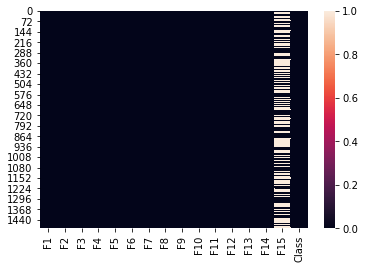

In [27]:
## Missing Values
sns.heatmap(data.isnull())

<b> Observations : </b><br>

- Only F15 column has missing values, remaining features donot have any missing values.
- Missing Values are treated using pipeline during model building.


In [28]:
## Numerical features: Usually numerical features are of 2 types, continuos and discrete

## creating a list of all numerical features
# creating a list of column names where datatype is not equal to boolean.
numerical_features =[column for column in data.columns if data[column].dtypes != bool]
print("All the column names except the Class column: ",numerical_features)
print(" ")

## Creating a list of dicrete features
# creating a list of column names where number of uniques features in the columns is lessthan 10
discrete_features = [column for column in numerical_features if data[column].nunique()<5 ]
print("Discrete features: {} \n ".format(discrete_features))

## Creating a list of continuos features
# creating a list of column names where number of uniques features in the columns is greaterthan 10
continuos_features = [column for column in numerical_features if column not in discrete_features ]
print("Continuos features: {} \n ".format(continuos_features))

All the column names except the Class column:  ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15']
 
Discrete features: ['F13'] 
 
Continuos features: ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F14', 'F15'] 
 


In [29]:
## Discrete features

# printing unique elements in discrete columns
for column in discrete_features:
    print("Unique elements in {} : {}".format(column,data[column].unique()))

Unique elements in F13 : [ 1 10  5  0]


In [30]:
data.F13.value_counts()

1     740
10    733
0      20
5       7
Name: F13, dtype: int64

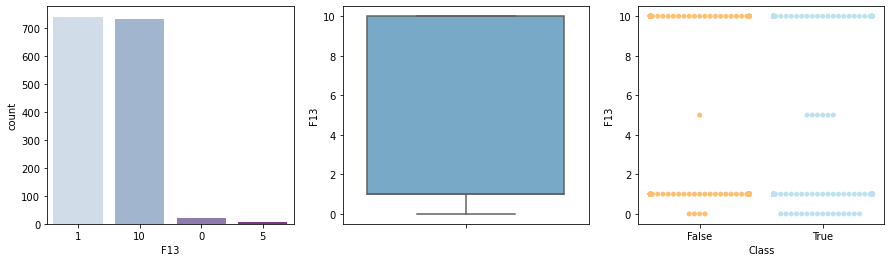

In [31]:
## Visualizing discrete features : 

## using seaborn countplot to see count of each unique value in feature F13
plt.figure(figsize=(15,4))
plt.subplot(131)
sns.countplot(data['F13'],order=data['F13'].value_counts().index,palette='BuPu')
## Plotting distribution of data with respect to categories
plt.subplot(132)
sns.boxplot(data["F13"],orient='v',palette='Blues')

## Visualizing relation ship between F13 and Class column
plt.subplot(133)
sns.swarmplot(x = 'Class',y = data['F13'],data=data,palette='RdYlBu')

<b> Observations: </b><br>

- In F13 feature, 98% of feature's data in present in values 1 and 10. We can say that customer prefer either taking 1 or 10. 


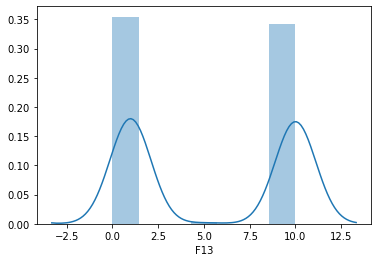

In [32]:
sns.distplot(data['F13'])

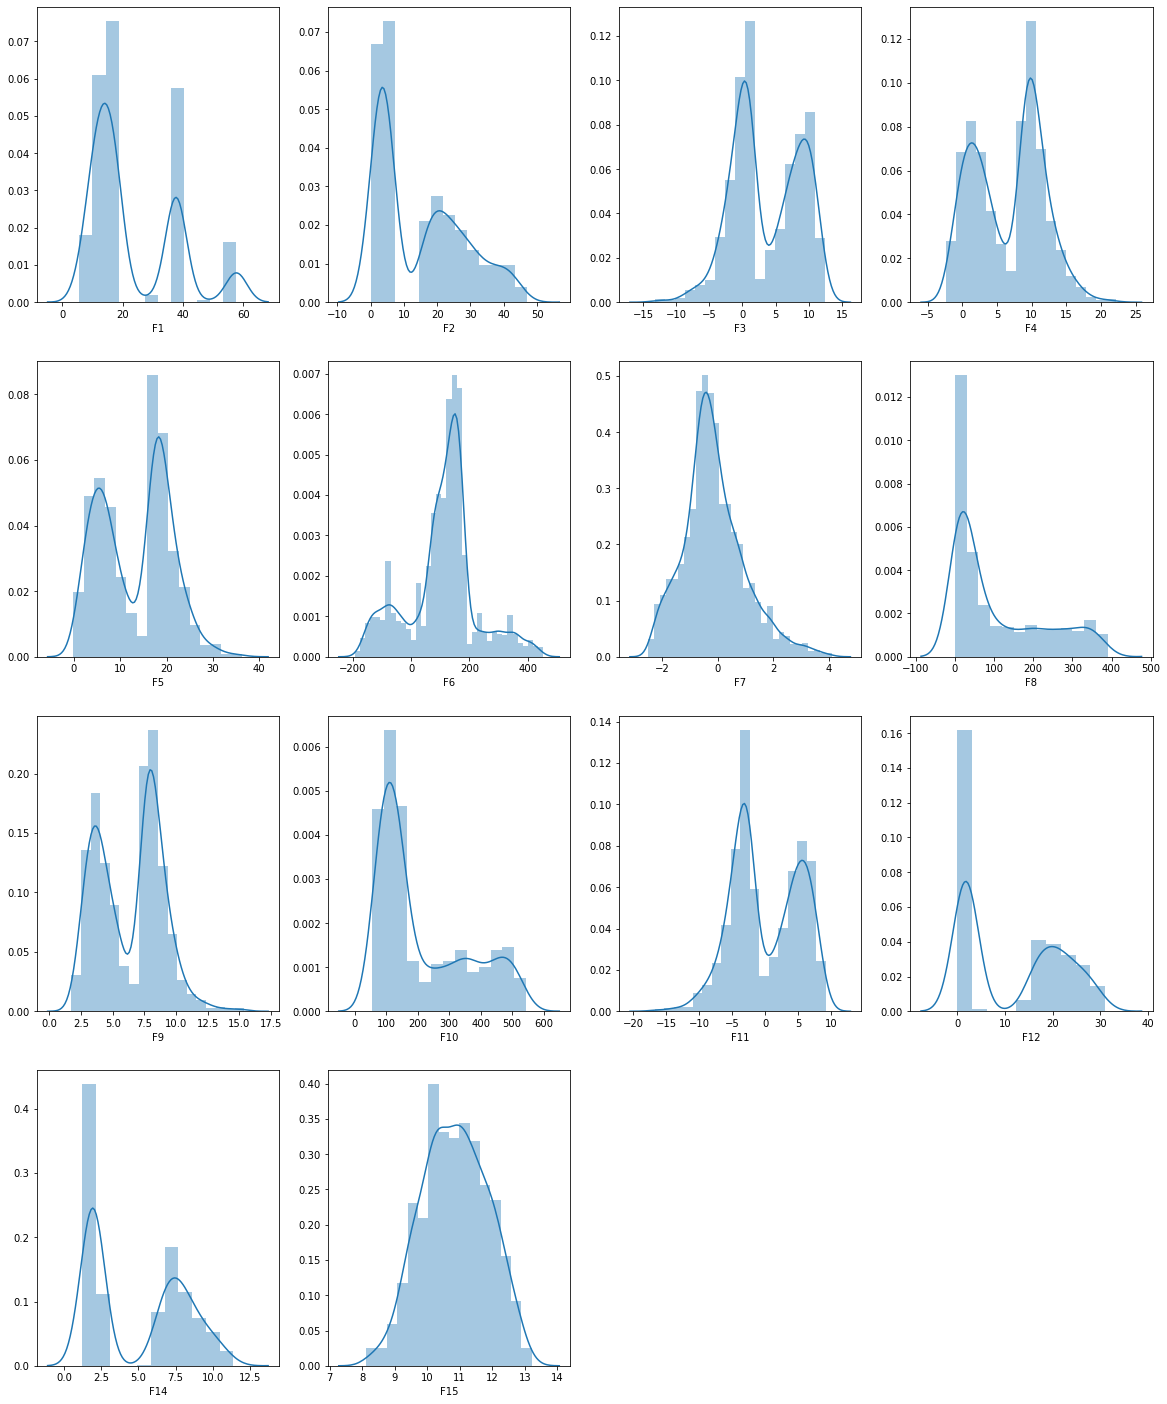

In [34]:
## Continuos features

## Visualizing continuos features : using seaborn distribution plot to see data distribution in each feature

plt.figure(figsize=(20,25))
plt_number = 1

for column_name in continuos_features:
    if plt_number <= 16:
        ax = plt.subplot(4,4,plt_number)
        sns.distplot(data[column_name])
        plt.xlabel(column_name)
    plt_number+=1

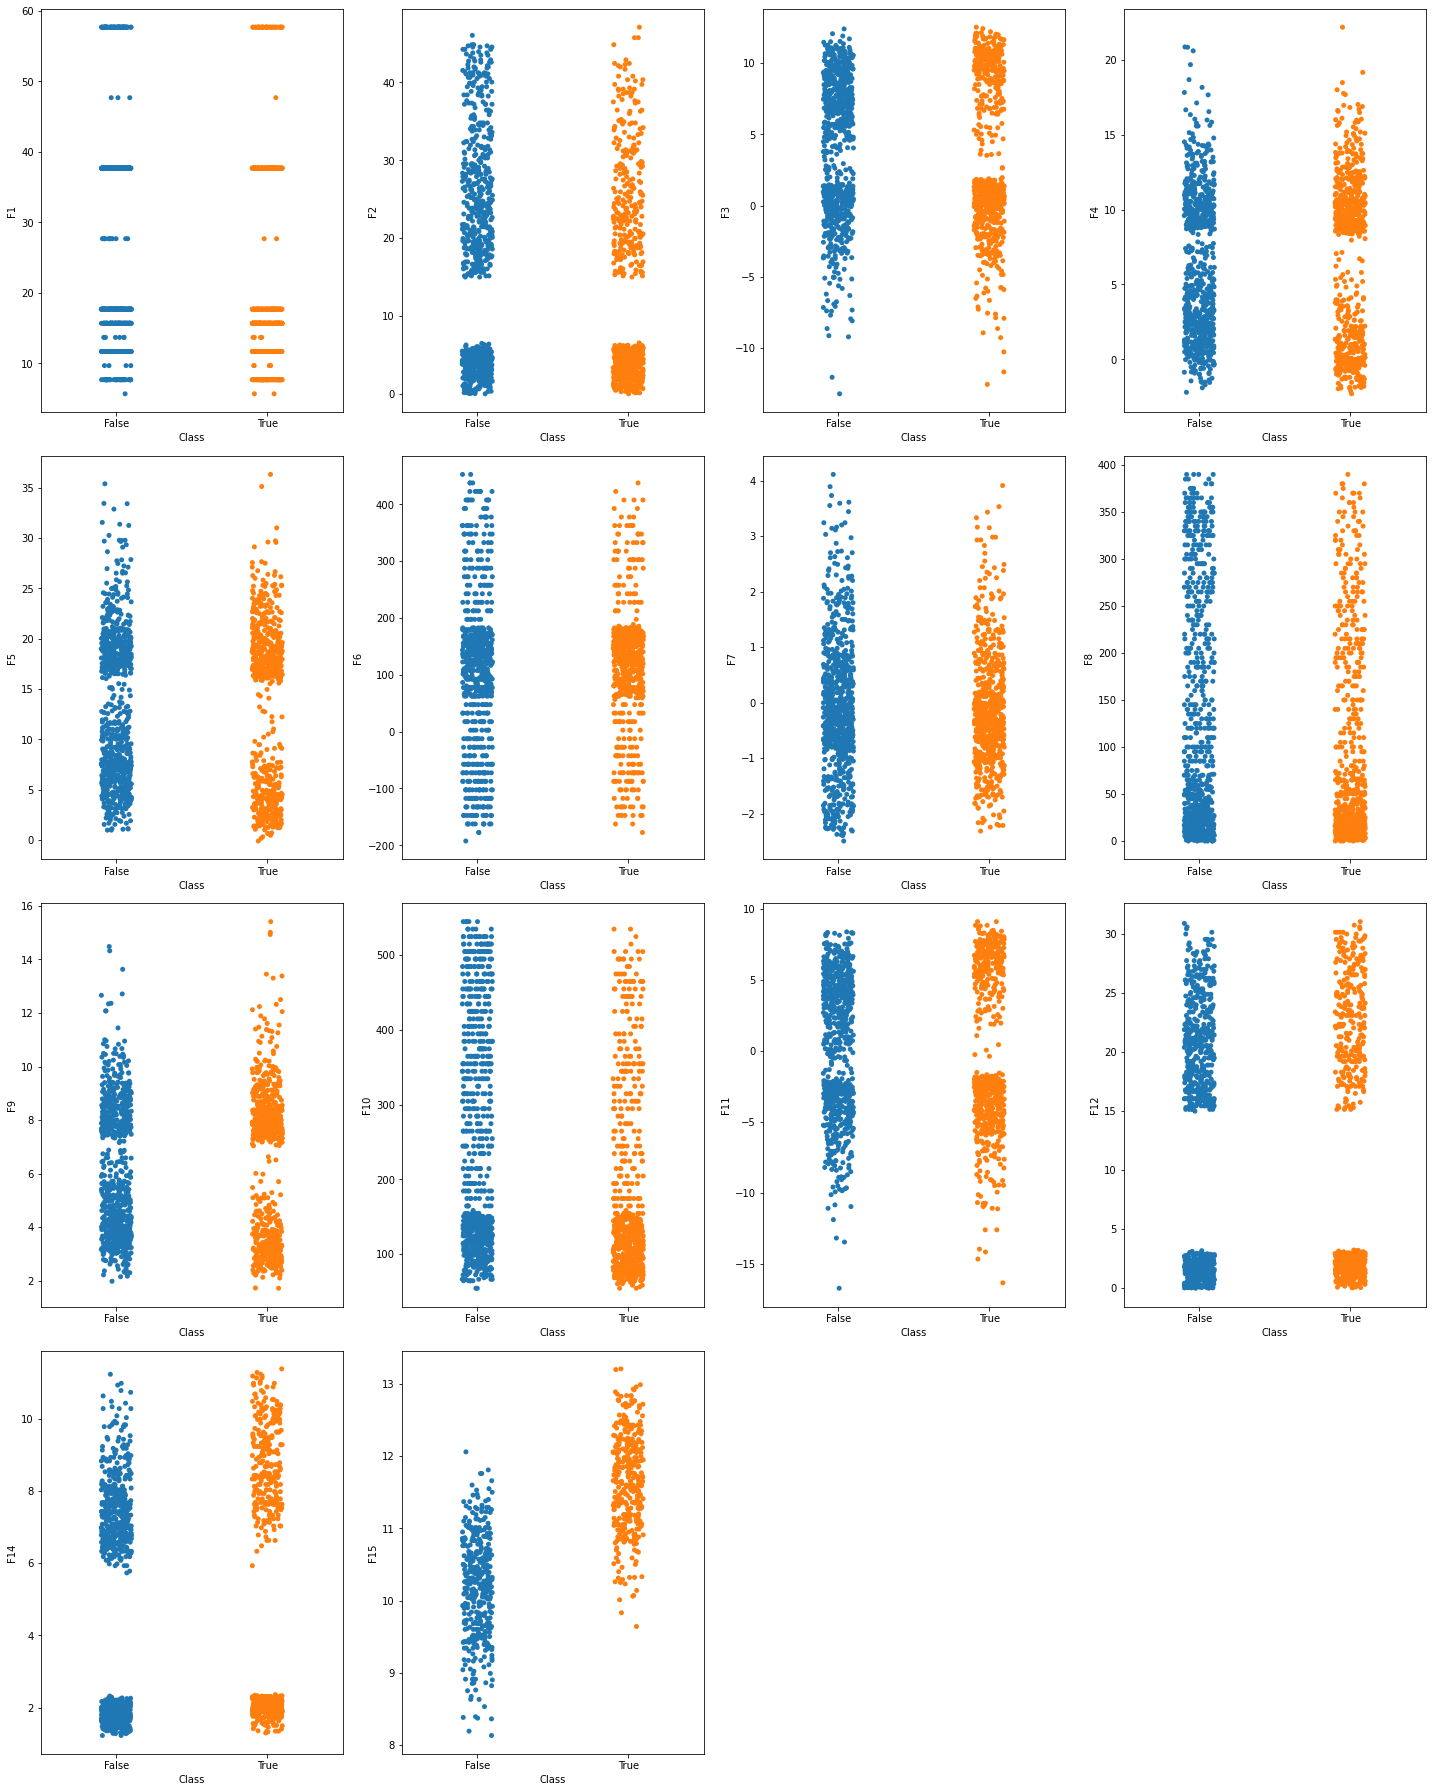

In [35]:
## Visualizing relationship between continuos features and Class column
X = data.drop(columns = 'Class')
y = data.Class

plt.figure(figsize=(20,25), facecolor='white')
plt_number = 1

for column_name in continuos_features:
    if plt_number<=16 :
        ax = plt.subplot(4,4,plt_number)
        sns.stripplot(y,X[column_name])
    plt_number+=1
plt.tight_layout()

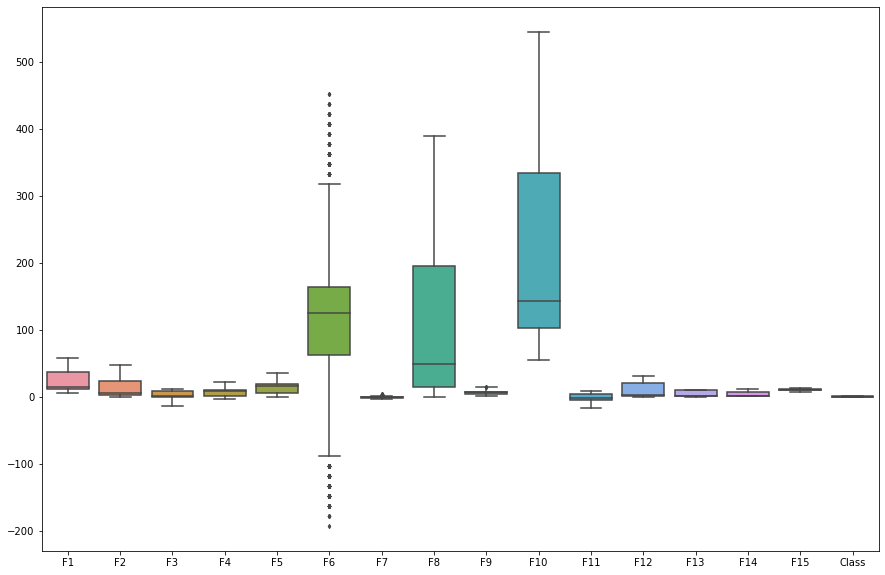

In [36]:
## Visualizing Outliers in data using seaborn boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.8,ax=ax,  fliersize=3)

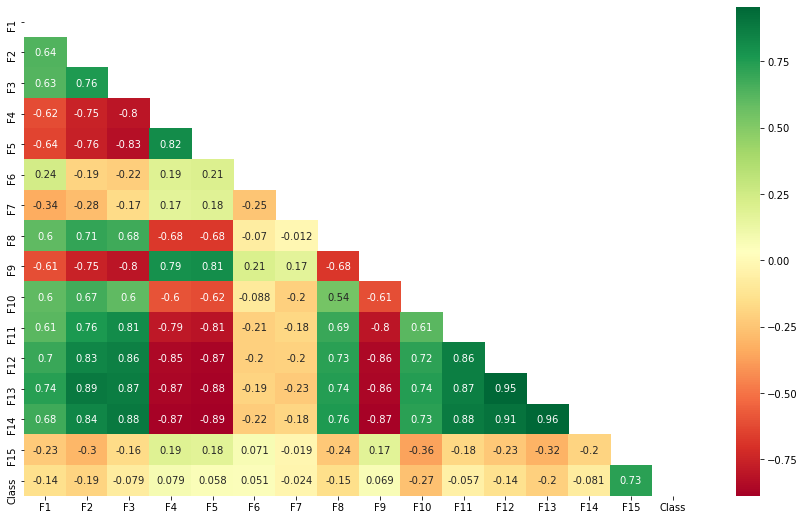

In [37]:
## correlation heatmap

corr_all = data.corr()
plt.figure(figsize=(15,9))
mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_all,cmap='RdYlGn',annot=True,mask=mask)

<b> Observations: </b><br>

- F15 column shows significantly high correlation (0.73) with response variable(Class). 
- Many features are also exhibiting high correlation with one another.

In [38]:
## Analyzing Response variable ( Class column)
data.Class.value_counts()

False    809
True     691
Name: Class, dtype: int64

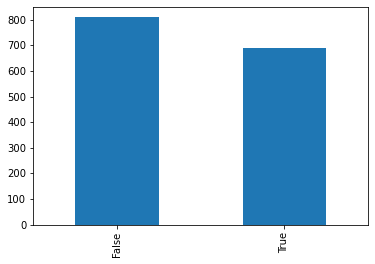

In [39]:
data.Class.value_counts().plot.bar()

<b> Observations: </b><br>

- There are 890 values in False Class and 691 values in True Class.
- This is a fairly balance dataset.

In [73]:
## The datatype of Class column is boolean, we need to convert that to numeric for training into machine learning model
## Mapping True to 0 and False to 1 using map function

data.Class = data.Class.map({True:1,False:0})

data.Class.unique()

array([0, 1], dtype=int64)

In [81]:
## separating features and response variable

# storing Class column in variable called y
y = data.Class

# Storing all the columns otherthan Class in variable called X
X = data.drop(columns = 'Class')

In [82]:

## Splitting data : 80% for training and 20% for validation 
## random_state is set to 45 to get reproducible output across multiple function calls

X_train, X_validation, y_train, y_validation = train_test_split(X,y,
                                                                test_size=0.20,
                                                                random_state=45)

In [83]:
print("length of X_train :      ",len(X_train))
print("length of X_validation : ",len(X_validation))
print("length of y_train :      ",len(y_train))
print("length of y_validation:  ",len(y_validation))

length of X_train :       1200
length of X_validation :  300
length of y_train :       1200
length of y_validation:   300


In [44]:
y_validation.value_counts()

0    167
1    133
Name: Class, dtype: int64

# Creating machine learning models using DecisionTreeClassifier, SupportVectorClassifier, KNeighborsClassifier,LogisticReression and RandomForestClassifier algoritms

<b>The following 3 steps will be common for all the models that are going to be built: </b>
- step1 : creating a pipeline for data preprocessing , pipiline contains an imputer and a scaler
- step2 : Defining a cross-validation stragtegy using StratifiedKFold crossvalidator
- step3 : Creating a function called gridsearch which takes a classifier, parameters for grid search and cross validator and    returns the best estimator

In [45]:
## step1: Pipeline creation
## The pipeline follows 2 steps: 
#     First it replaces all the missing values in the column with the column mean.
#     Second it scales the data using RobustScaler.

preprocesssor = Pipeline(steps = 
    [
        ('imputer', SimpleImputer(strategy='mean')), # Imputation transformer for completing missing values
        ('scaler', RobustScaler()) # RoustScaler removes the median and scales the data according to the quantile range(defaults to Interquartile Range).
    ])

## Step2 : The following Crossvalidation method will be used in all the models

cv = StratifiedKFold(n_splits=10)
## This cross-validation object is a variation of KFold that returns stratified folds.
## The folds are made by preserving the percentage of samples for each class.


In [46]:
# step3: creating a function to perform gridsearch

def gridsearch(classifier, grid_params, cv):
    
    """This function takes a classifier, parameters for grid search and cross validator as arguments
    and returns the classifier with high accuracy"""
    
    ## estimator to gridsearch is a pipeline that performs data preprocesssing and applies a fit with the given classifier.
    model = GridSearchCV(
                            estimator  = Pipeline(steps =[('preprocess',preprocesssor),('classifier',classifier)]),
                            param_grid = grid_params,  # perform gridsearch on grid parameters given
                            scoring    = 'accuracy',   # accuracy is used as scoring metric
                            n_jobs     = -1,           # n_jobs = -1,uses all the processors
                            cv         = cv,
                            verbose    = 2
                       )
    model.fit(X_train,y_train) # Fitting the training data.
    return model

## DecisionTreeClassifier

In [47]:
## Defining parameters for gridsearch and calling the gridsearch function

Fitting 10 folds for each of 5184 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 2352 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 3812 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 5592 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 7700 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 10128 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 12884 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 15960 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 19364 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 23088 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 27140 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 31512 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 36212 tas

Best parameters :  {'classifier__criterion': 'entropy', 'classifier__max_depth': 18, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 7, 'classifier__splitter': 'random'}  

Training Accuracy :    0.8116666666666668
Validation Accuracy :  0.7533333333333333 
 
auc :  0.7462968799243619 

Confusion Matrix: 
 [[135  32]
 [ 42  91]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       167
           1       0.74      0.68      0.71       133

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



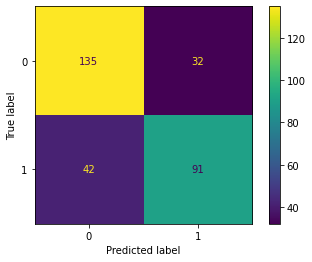

In [48]:
# Parameters for gridsearch
grid_parameters = {  
                   'classifier__criterion':         ['gini','entropy'],
                   'classifier__max_depth':         range(2,20,1),
                   'classifier__min_samples_leaf':  range(1,10,1),
                   'classifier__min_samples_split': range(2,10,1),
                   'classifier__splitter'         : ['best','random']
                  }

# Calling the function gridsearch with DecisionTreeClassifier,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(DecisionTreeClassifier(random_state = 1),grid_parameters,cv)

## Printing best parameters given by gridsearch 
print("Best parameters : ", model.best_params_, " \n")

## printing train accuracy
print("Training Accuracy :   ", model.best_score_)

## Making predictions on validation data
y_predicted = model.best_estimator_.predict(X_validation)

## Calculating accuracy score on validation data
accuracy_dt = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_dt),  "\n ")

# Area Under Curve : 
auc_dt = roc_auc_score(y_validation, y_predicted) # Compute Area Under the ROC Curve (ROC AUC) from prediction scores.
print("auc : ", auc_dt,  "\n")
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_validation, y_predicted)

## priting confusion matrix to evaluate the accuracy of classification.
cm_dt = confusion_matrix(y_validation, y_predicted)
print("Confusion Matrix: \n",cm_dt)
disp = ConfusionMatrixDisplay(cm_dt)
disp.plot()

## printing Classification Report: A text report showing the main classification metrics.
print(" ")
print("Classification Report : \n", classification_report(y_validation, y_predicted))

## Saving the best estimator
Best_estimator_dt =  model.best_estimator_

In [49]:
Best_estimator_dt

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=18,
                                        min_samples_split=7, random_state=1,
                                        splitter='random'))])

## KNeighborsClassifier 

Fitting 10 folds for each of 5292 candidates, totalling 52920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 2376 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 3836 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 5616 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 7724 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 10152 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12908 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 15984 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 19388 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 23112 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 27164 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 31536 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 36236 tas

Best parameters :  {'classifier__algorithm': 'ball_tree', 'classifier__leaf_size': 1, 'classifier__n_neighbors': 17, 'classifier__p': 1, 'classifier__weights': 'distance'}  

Training Accuracy :    0.7908333333333333
Validation Accuracy :  0.7733333333333333 
 
auc :  0.7711494304623835 

Confusion Matrix: 
 [[132  35]
 [ 33 100]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.79      0.80       167
           1       0.74      0.75      0.75       133

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



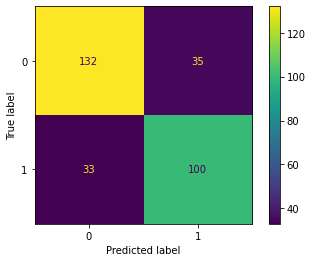

In [50]:
# Parameters for gridsearch
grid_parameters = { 
    
                   'classifier__algorithm'  :   ['ball_tree', 'kd_tree', 'brute'],
                   'classifier__leaf_size'  :   range(1,50),
                   'classifier__n_neighbors':   range(3,20,2), # odd numbers
                   'classifier__p'          :   [1,2],
                   'classifier__weights'    :   ['uniform', 'distance'] }

# Calling the function gridsearch with KNeighborsClassifier,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(KNeighborsClassifier(),grid_parameters,cv)

## Printing best parameters given by gridsearch 
print("Best parameters : ", model.best_params_, " \n")

## printing train accuracy
print("Training Accuracy :   ", model.best_score_)

## Making predictions on validation data
y_predicted = model.best_estimator_.predict(X_validation)

## Calculating accuracy score on validation data
accuracy_knn = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_knn),  "\n ")

# Area Under Curve : 
auc_knn = roc_auc_score(y_validation, y_predicted) # Compute Area Under the ROC Curve (ROC AUC) from prediction scores.
print("auc : ", auc_knn,  "\n")
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_validation, y_predicted)

## priting confusion matrix to evaluate the accuracy of classification.
cm_knn = confusion_matrix(y_validation, y_predicted)
print("Confusion Matrix: \n",cm_knn)
disp = ConfusionMatrixDisplay(cm_knn)
disp.plot()

## printing Classification Report: A text report showing the main classification metrics.
print(" ")
print("Classification Report : \n", classification_report(y_validation, y_predicted))

## Saving the best estimator
Best_estimator_knn =  model.best_estimator_

In [51]:
Best_estimator_knn

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('classifier',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=1,
                                      n_neighbors=17, p=1,
                                      weights='distance'))])

## SupportVectorClassifier

In [ ]:
# Parameters for gridsearch
grid_parameters = {  
                   'classifier__C'     :        np.logspace(-1,2,20), 
                   'classifier__gamma' :        np.logspace(-5,5,10),
                   'classifier__kernel':        ['rbf','linear']
                  }

# Calling the function gridsearch with SupportVectorClassifier,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(SVC(random_state = 1),grid_parameters,cv)

## Printing best parameters given by gridsearch 
print("Best parameters : ", model.best_params_, " \n")

## printing train accuracy
print("Training Accuracy :   ", model.best_score_)

## Making predictions on validation data
y_predicted = model.best_estimator_.predict(X_validation)

## Calculating accuracy score on validation data
accuracy_svc = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_svc),  "\n ")

# Area Under Curve : 
auc_svc = roc_auc_score(y_validation, y_predicted) # Compute Area Under the ROC Curve (ROC AUC) from prediction scores.
print("auc : ", auc_svc,  "\n")
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_validation, y_predicted)

## priting confusion matrix to evaluate the accuracy of classification.
cm_svc = confusion_matrix(y_validation, y_predicted)
print("Confusion Matrix: \n",cm_svc)
disp = ConfusionMatrixDisplay(cm_svc)
disp.plot()

## printing Classification Report: A text report showing the main classification metrics.
print(" ")
print("Classification Report : \n", classification_report(y_validation, y_predicted))       

## Saving the best estimator
Best_estimator_svc =  model.best_estimator_

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  6.0min


In [53]:
Best_estimator_svc 

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('classifier',
                 SVC(C=33.59818286283781, gamma=1e-05, kernel='linear',
                     random_state=1))])

# RandomForestClassifier

Fitting 10 folds for each of 38880 candidates, totalling 388800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2868 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3922 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 5136 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6514 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 9754 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 11616 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 13642 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 15828 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 18178 tasks   

Best parameters :  {'classifier__max_depth': 5, 'classifier__max_leaf_nodes': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 70}  

Training Accuracy :    0.8366666666666667
Validation Accuracy :  79.0 
 
auc :  0.7922425825041646 

Confusion Matrix: 
 [[129  38]
 [ 25 108]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80       167
           1       0.74      0.81      0.77       133

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



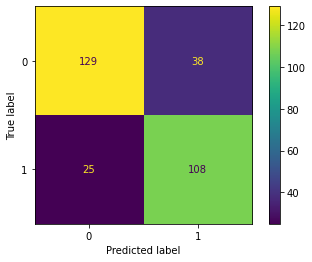

In [54]:
# Parameters for gridsearch
grid_parameters = { 
                    "classifier__n_estimators"     : [10,20,30,40,50,60,70,80,90,100],  
                    "classifier__max_depth"        : range(2,20,1),
                    "classifier__min_samples_leaf" : range(1,10,1),
                    "classifier__min_samples_split": range(2,10,1),
                    "classifier__max_leaf_nodes"   : [2, 5,10]
              }

# Calling the function gridsearch with RandomForestClassifier,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(RandomForestClassifier(random_state = 1),grid_parameters,cv)

## Printing best parameters given by gridsearch 
print("Best parameters : ", model.best_params_, " \n")

## printing train accuracy
print("Training Accuracy :   ", model.best_score_)

## Making predictions on validation data
y_predicted = model.best_estimator_.predict(X_validation)

## Calculating accuracy score on validation data
accuracy_randomForest = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_randomForest * 100),  "\n ")

# Area Under Curve : 
auc_randomForest = roc_auc_score(y_validation, y_predicted) # Compute Area Under the ROC Curve (ROC AUC) from prediction scores.
print("auc : ", auc_randomForest,  "\n")
fpr_random, tpr_random, thresholds_random = roc_curve(y_validation, y_predicted)

## priting confusion matrix to evaluate the accuracy of classification.
cm_randomForest = confusion_matrix(y_validation, y_predicted)
print("Confusion Matrix: \n",cm_randomForest)
disp = ConfusionMatrixDisplay(cm_randomForest)
disp.plot()

## printing Classification Report: A text report showing the main classification metrics.
print(" ")
print("Classification Report : \n", classification_report(y_validation, y_predicted))   

## Saving the best estimator
Best_estimator_randomForest =  model.best_estimator_

In [55]:
Best_estimator_randomForest

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('classifier',
                 RandomForestClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_split=5, n_estimators=70,
                                        random_state=1))])

## Logistic Regression

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   24.1s finished


Best parameters :  {'classifier__C': 5.455594781168517, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}  

Training Accuracy :    0.8825
Validation Accuracy :  0.8533333333333334 
 
auc :  0.8544865156904236 

Confusion Matrix: 
 [[141  26]
 [ 18 115]]
 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       167
           1       0.82      0.86      0.84       133

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300



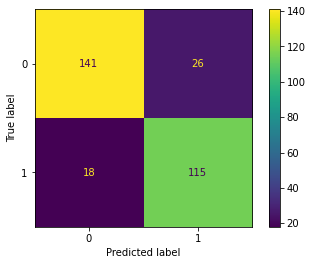

In [56]:
# Parameters for gridsearch
grid_parameters = { 
                    'classifier__penalty' :   ['l1', 'l2', 'elasticnet'],
                    'classifier__C'       :   np.logspace(-1, 2, 20),
                    'classifier__solver'  :   ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                  }


# Calling the function gridsearch with RandomForestClassifier,grid_parameters and Cross validator,saving the model in a variable.
model = gridsearch(LogisticRegression(random_state = 1),grid_parameters,cv)

## Printing best parameters given by gridsearch 
print("Best parameters : ", model.best_params_, " \n")

## printing train accuracy
print("Training Accuracy :   ", model.best_score_)

## Using the fitted model making predictions on validation data and stroring them in a variable called y_predicted.
y_predicted = model.best_estimator_.predict(X_validation)

## Calculating accuracy score on validation data
accuracy_logistic = accuracy_score(y_validation, y_predicted)
print("Validation Accuracy : ", (accuracy_logistic),  "\n ")

# Area Under Curve : 
auc_logistic = roc_auc_score(y_validation, y_predicted) # Compute Area Under the ROC Curve (ROC AUC) from prediction scores.
print("auc : ", auc_logistic,  "\n")
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_validation, y_predicted)

## priting confusion matrix to evaluate the accuracy of classification.
cm_logistic = confusion_matrix(y_validation, y_predicted)
print("Confusion Matrix: \n",cm_logistic)
disp = ConfusionMatrixDisplay(cm_logistic)
disp.plot()

## printing Classification Report: A text report showing the main classification metrics.
print(" ")
print("Classification Report : \n", classification_report(y_validation, y_predicted))   

## Saving the best estimator
Best_estimator_logistic=  model.best_estimator_

In [57]:
Best_estimator_logistic

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', RobustScaler())])),
                ('classifier',
                 LogisticRegression(C=5.455594781168517, penalty='l1',
                                    random_state=1, solver='liblinear'))])

## Comparing the performance of different models built 

In [58]:
## creating a dictionay of models with classifier names and corresponding validation accuracy of each classifier
models= {
            "DecisionTreeClassifier" : [accuracy_dt],
            "KNeighbors Classifier"  : [accuracy_knn],
            "RandomForestClassifier" : [accuracy_randomForest],
            "LogisticRegression"     : [accuracy_logistic],
            "SVC"                    : [accuracy_svc]
            
            }

# Creating a datframe with models dictionary
results = pd.DataFrame(models,index=['Accuracy']).transpose()
results

,Accuracy
DecisionTreeClassifier,0.753333
KNeighbors Classifier,0.773333
RandomForestClassifier,0.790000
LogisticRegression,0.853333
SVC,0.856667


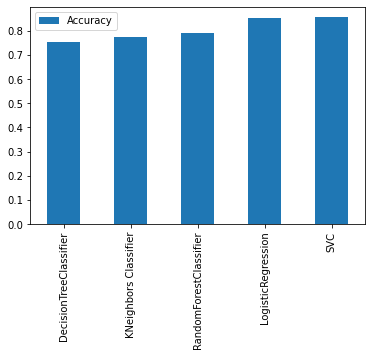

In [59]:
# Plotting bar graph to compare the accuracies of models 
results.plot.bar()

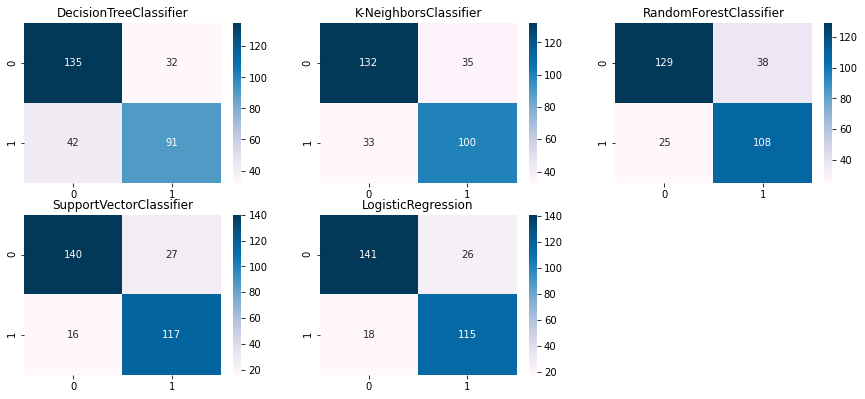

In [60]:
## comparing the confusion matrices obtained using each model
plt.figure(figsize=(15,10))
plt_number = 1
confusion_matrices = [cm_dt,cm_knn,cm_randomForest,cm_svc,cm_logistic]
matrix_names = ['DecisionTreeClassifier','K-NeighborsClassifier','RandomForestClassifier','SupportVectorClassifier','LogisticRegression']

for matrix,matrix_name in zip(confusion_matrices ,matrix_names):
    if plt_number <= 6:
        ax = plt.subplot(3,3,plt_number)
        sns.heatmap(matrix, annot=True,fmt='d',cmap='PuBu')
        plt.title(matrix_name)
    plt_number+=1

In [61]:
# Flattening confusion matrix predicted for each modelusing ravel() method and 
## storing True Negatines, False Positives, False Negatives and True Positives in lists
[tn_dt, fp_dt, fn_dt, tp_dt] = cm_dt.ravel()
[tn_knn, fp_knn, fn_knn, tp_knn] = cm_knn.ravel()
[tn_svc, fp_svc, fn_svc, tp_svc] = cm_svc.ravel()
[tn_logistc, fp_logistic, fn_logistic, tp_logistic ] = cm_logistic.ravel()
[tn_random, fp_random, fn_random, tp_random] = cm_randomForest.ravel()

# storing each list as value, corresponding classifier name as key in dictionary and converting them into dataframe
df = pd.DataFrame({
              'DecisionTree' :     [tn_dt, fp_dt, fn_dt, tp_dt],
              'Randomforest':      [tn_random, fp_random, fn_random, tp_random],
              'KNN' :              [tn_knn, fp_knn, fn_knn, tp_knn],
              'LogisticRegression':[tn_logistc, fp_logistic, fn_logistic, tp_logistic ],
              'SVC':               [tn_svc, fp_svc, fn_svc, tp_svc]
              },
             index=['True Negatives','False Positives','False Negatives','True Positives'])

## visualizing dataframe to see the predictions of each model
df

,DecisionTree,Randomforest,KNN,LogisticRegression,SVC
True Negatives,135,129,132,141,140
False Positives,32,38,35,26,27
False Negatives,42,25,33,18,16
True Positives,91,108,100,115,117


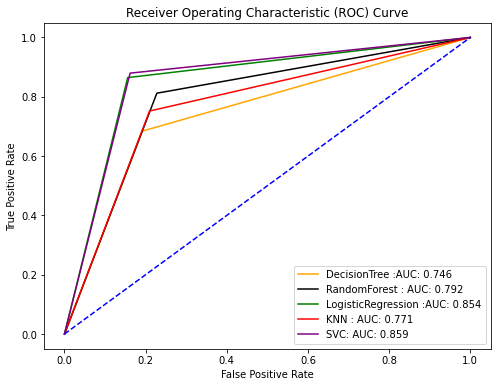

In [62]:
## Plotting AreaUnderCurve(AUC)
plt.figure(figsize=(8,6))
plt.plot(fpr_dt,tpr_dt,label="DecisionTree :AUC: %.3f" % (auc_dt), color = 'orange')
plt.plot(fpr_random,tpr_random, label="RandomForest : AUC: %.3f" % (auc_randomForest), color = 'black')
plt.plot(fpr_logistic,tpr_logistic,label="LogisticRegression :AUC: %.3f" % (auc_logistic), color = 'green')
plt.plot(fpr_knn,tpr_knn, label="KNN : AUC: %.3f" % (auc_knn), color = 'red')
plt.plot(fpr_svc,tpr_svc, label="SVC: AUC: %.3f" % (auc_svc), color = 'purple')
plt.plot([0, 1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Predictions on Test Data

In [84]:
## Reading the given test dataset into pandas dataframe
test_data = pd.read_csv("CE802_P2_Data/CE802_P2_Test.csv")

## Displaying the first 5 rows of data
test_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN,NaN
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN,NaN
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,NaN
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73,NaN
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31,NaN


In [85]:
## Dropping the class column from test data
test = test_data.drop(columns='Class')

In [86]:
## Predicting the class labels of test data using the best model chosen 
## SVC showed highest accuracy of 86% and using that model, we are predicting class labels of test data

Class_predictions = Best_estimator_svc.predict(test)
Class_predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [78]:
# Alternativelt we can save the model to the local file system for deployment
import pickle
filename = 'classifiaction_model.pickle'
pickle.dump(Best_estimator_svc, open(filename, 'wb'))

In [79]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
predited_values=loaded_model.predict(test) 
predited_values

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [68]:
##  Adding the 'Class' column to test dataframe and assigning the predictions to 'Class' column.
test['Class'] = Class_predictions

In [69]:
## Visualizing first 5 rows of test dataframe
test.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN,0
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN,0
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,1
3,11.7,2.61,-8.28,8.96,23.22,161.58,1.69,6,8.54,64.56,-6.52,1.32,1,1.80,11.73,1
4,7.7,5.55,1.52,8.50,21.66,95.58,2.41,22,10.74,128.56,-3.84,2.76,1,2.22,12.31,1


In [70]:
## Counts the number of False and True Labels in test data
test.Class.value_counts()

0    795
1    705
Name: Class, dtype: int64

In [71]:
## Converting test dataframe to csv file and storing it with file name 'CE802_P2_Test.csv'
test.to_csv("CE802_P2_Test.csv",index=False)

In [72]:
pd.read_csv("CE802_P2_Test.csv").head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,37.7,33.15,9.26,3.88,5.91,-12.42,-0.77,165,3.32,334.56,4.42,18.75,10,7.78,NaN,0
1,17.7,24.30,6.58,3.40,10.47,-57.42,-0.77,20,3.22,224.56,0.28,15.30,10,8.13,NaN,0
2,37.7,17.55,10.16,-1.94,6.90,92.58,-0.84,215,4.71,94.56,6.98,17.70,10,10.08,13.27,1
